In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df_finance = pd.read_excel('df_Movie_Financials.xlsx')
df_nofinance = pd.read_excel('df_Generes_With_tconst.xlsx')
df = pd.read_excel('df_IMDB_MovieCatalog.xlsx')

In [64]:
# Investigate the Data
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 9 columns):
Unnamed: 0          5540 non-null int64
tconst              5540 non-null object
P_Cost              5540 non-null float64
Dom_Gross           5540 non-null int64
Frgn_Gross          5540 non-null int64
WW_Gross            5540 non-null int64
Domestic Opening    5540 non-null int64
profit              5540 non-null float64
ROI                 5540 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 389.7+ KB


In [62]:
# Create new column, which represents the movie profit
df_finance['profit'] = df_finance['WW_Gross'] - df_finance['P_Cost']
df_finance['ROI'] = (df_finance['profit']/df_finance['P_Cost'])*100

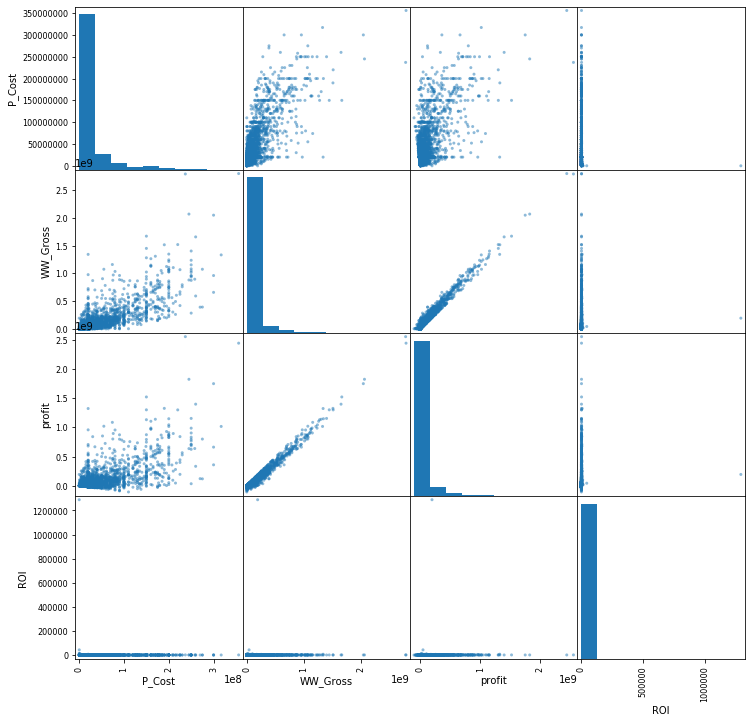

In [65]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df_finance[['P_Cost', 'WW_Gross', 'profit', 'ROI']], figsize=(12,12));

In [ ]:
# Comments: There is a very strong positive linear relationship between WW_Gross and profit.

In [11]:
# Understanding opening dates
df_finance['Domestic Opening'].head(40)

0      56061504
1        388166
2     108435841
3       5935256
4        501003
5      20617667
6             0
7       9600000
8         53218
9         73837
10     50237000
11     10016021
12            0
13     16025987
14       586028
15     10208431
16     60119509
17     47743273
18     18068372
19        85327
20     19635996
21      1202000
22     97852865
23     16849640
24    102685961
25     12400125
26        39550
27     33369559
28       229685
29       122014
30     10600000
31         8222
32        15117
33      9912110
34       180000
35      3755575
36       531018
37     52535096
38      6021106
39        36272
Name: Domestic Opening, dtype: int64

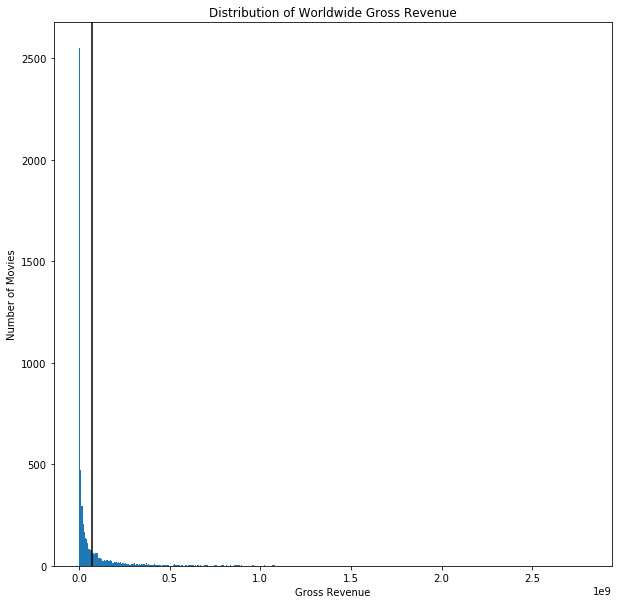

In [16]:
# Create a plot that shows the Distribution of Worldwide Gross Revenue
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(df['WW_Gross'], bins='auto')
ax.set_title('Distribution of Worldwide Gross Revenue')
ax.set_xlabel('Gross Revenue')
ax.set_ylabel('Number of Movies')
ax.axvline(df['WW_Gross'].mean(), color='black');

In [17]:
# Comments from above: Looks like there are a large number of 0.0 values.
# I'd like to plot the information for all movies that actually made money.

In [29]:
df_nofinance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189509 entries, 0 to 189508
Data columns (total 11 columns):
Unnamed: 0        189509 non-null int64
tconst            189509 non-null object
titleType         189509 non-null object
primaryTitle      189509 non-null object
originalTitle     189509 non-null object
startYear         189509 non-null int64
runtimeMinutes    189509 non-null int64
genres            189509 non-null object
averageRating     189509 non-null float64
numVotes          189509 non-null int64
Splitgeneres      189509 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 15.9+ MB


In [30]:
df_nofinance[['tconst', 'genres', 'Splitgeneres']].head(40)

,tconst,genres,Splitgeneres
0,tt0016906,"Comedy,Musical",Comedy
1,tt0016906,"Comedy,Musical",Musical
2,tt0062336,Drama,Drama
3,tt0064322,"Drama,Thriller",Drama
4,tt0064322,"Drama,Thriller",Thriller
5,tt0065392,Documentary,Documentary
6,tt0069049,Drama,Drama
7,tt0088751,"Comedy,Horror,Sci-Fi",Comedy
8,tt0088751,"Comedy,Horror,Sci-Fi",Horror
9,tt0088751,"Comedy,Horror,Sci-Fi",Sci-Fi


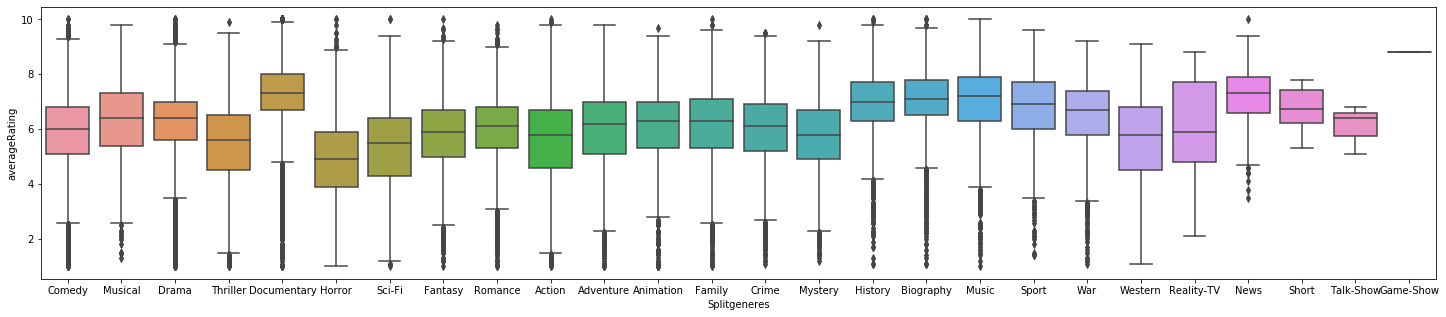

In [40]:
#boxplot of movie rating by genre
plt.figure(figsize=(25,5))
sns.boxplot(x="Splitgeneres", y="averageRating", data=df_nofinance);

In [66]:
df_genres = df_nofinance[['tconst', 'Splitgeneres']].set_index('tconst')
df_ROI = df_finance[['tconst', 'ROI']].set_index('tconst')

In [71]:
df_ROIbyGenre = pd.concat([df_genres, df_ROI], axis=0, join='inner')

SyntaxError: positional argument follows keyword argument (<ipython-input-71-1c3374e77864>, line 1)

In [69]:
df_ROIbyGenre.head(20)

""
tconst
tt0016906
tt0016906
tt0062336
tt0064322
tt0064322
tt0065392
tt0069049
tt0088751
tt0088751


In [53]:
df.head(40)

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,startYear_str,titleyear,MPAA,studio_IMDB,studio_BOM,rd_fin
0,0,tt0069049,The Other Side Of The Wind,2018,122,Drama,2018,The Other Side Of The Wind2018,NaN,NaN,NaN,NaT
1,1,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy",2017,The Wandering Soap Opera2017,NaN,NaN,NaN,NaT
2,2,tt0118141,What Is It?,2005,72,Drama,2005,What Is It?2005,NaN,NaN,NaN,NaT
3,3,tt0119970,My Apocalypse,2008,82,"Comedy,Drama,Sci-Fi",2008,My Apocalypse2008,NaN,NaN,NaN,NaT
4,4,tt0120667,Fantastic Four,2005,106,"Action,Adventure,Fantasy",2005,Fantastic Four2005,PG-13,Twentieth Century FoxSee full company information,NaN,2005-07-06
5,5,tt0121164,Corpse Bride,2005,77,"Animation,Drama,Family",2005,Corpse Bride2005,PG,Warner Bros.See full company information,NaN,2005-09-16
6,6,tt0121766,Star Wars: Episode Iii - Revenge Of The Sith,2005,140,"Action,Adventure,Fantasy",2005,Star Wars: Episode Iii - Revenge Of The Sith2005,PG-13,Twentieth Century FoxSee full company information,NaN,2005-05-18
7,7,tt0143558,Father'S Acre,2009,85,Drama,2009,Father'S Acre2009,NaN,NaN,NaN,NaT
8,8,tt0167011,Space Butchers,2005,68,"Action,Comedy,Horror",2005,Space Butchers2005,NaN,NaN,NaN,NaT
9,9,tt0176694,The Tragedy Of Man,2011,160,"Animation,Drama,History",2011,The Tragedy Of Man2011,NaN,NaN,NaN,NaT


In [56]:
df[['tconst', 'studio_IMDB', 'studio_BOM']].head(50)

,tconst,studio_IMDB,studio_BOM
0,tt0069049,NaN,NaN
1,tt0100275,NaN,NaN
2,tt0118141,NaN,NaN
3,tt0119970,NaN,NaN
4,tt0120667,Twentieth Century FoxSee full company information,NaN
5,tt0121164,Warner Bros.See full company information,NaN
6,tt0121766,Twentieth Century FoxSee full company information,NaN
7,tt0143558,NaN,NaN
8,tt0167011,NaN,NaN
9,tt0176694,NaN,NaN


In [79]:
df.studio_IMDB.head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Twentieth Century FoxSee full company information
Name: studio_IMDB, dtype: object